In [1]:
!pip install numpy
!pip install pandas
!pip install sklearn
!pip install matplotlib

     |████████████████████████████████| 16.8 MB 2.5 MB/s            
     |████████████████████████████████| 11.7 MB 916 kB/s            
  Preparing metadata (setup.py) ... done
     |████████████████████████████████| 26.4 MB 4.4 MB/s            
     |████████████████████████████████| 42.1 MB 158 kB/s            
     |████████████████████████████████| 306 kB 6.9 MB/s            
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1309 sha256=b8ccc65f22b2e63ea231e9ea1b4824206c1db6b4f26a0494069979d911e293c0
  Stored in directory: /home/jovyan/.cache/pip/wheels/e4/7b/98/b6466d71b8d738a0c547008b9eb39bf8676d1ff6ca4b22af1c
Successfully built sklearn
     |████████████████████████████████| 11.2 MB 688 kB/s            
     |████████████████████████████████| 4.3 MB 4.0 MB/s            
     |████████████████████████████████| 1.6 MB 7.0 MB/s            
     |████████████████████████████████| 930 kB 5.8 MB/s            


['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module']
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:   

/tmp/ipykernel_101/3018762393.py:20: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = (iris["target"]==2).astype(np.int)


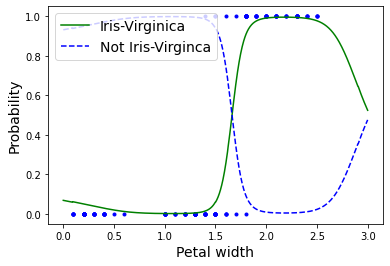

[[0 0 0 ... 2 2 2]
 [0 0 0 ... 2 2 2]
 [0 0 0 ... 2 2 2]
 ...
 [0 0 0 ... 2 2 2]
 [0 0 0 ... 2 2 2]
 [0 0 0 ... 2 2 2]]


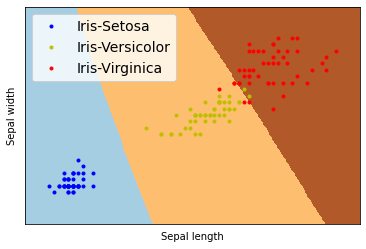

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier

import matplotlib
import matplotlib.pyplot as plt


iris = datasets.load_iris()

print(list(iris.keys()))
# print(iris["data"])
# print(iris["target"])
print(iris["DESCR"])

X = iris["data"][:,3:]  # petal width
y = (iris["target"]==2).astype(np.int)

clf = svm.SVC(gamma='scale', decision_function_shape='ovo', probability=True)
clf.fit(X,y)

X_new = np.linspace(0,3,1000).reshape(-1,1)
y_proba = clf.predict_proba(X_new)

plt.plot(X,y,"b.")
plt.plot(X_new,y_proba[:,1],"g-",label="Iris-Virginica")
plt.plot(X_new,y_proba[:,0],"b--",label="Not Iris-Virginca")
plt.xlabel("Petal width", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.show()

clf.predict([[1.7],[1.5]])

iris = datasets.load_iris()

X = iris["data"][:,(2,3)]  # petal length, petal width
y = iris["target"]

clf = svm.SVC(gamma='scale', decision_function_shape='ovo')
clf.fit(X,y)


x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
print(Z)


plt.figure(1, figsize=(6,4))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.figure(1, figsize=(4, 3))
#plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "b.", label="Iris-Setosa")
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "y.", label="Iris-Versicolor")
plt.plot(X[:, 0][y==2], X[:, 1][y==2], "r.", label="Iris-Virginica")
plt.legend(loc="upper left", fontsize=14)

plt.show()